In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_parquet("Data/fhv_tripdata_2021-01.parquet")
data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037


In [38]:
data.describe()

,PUlocationID,DOlocationID
count,195845.000000,991892.000000
mean,139.859690,135.898030
std,74.991382,80.474902
min,1.000000,1.000000
25%,75.000000,67.000000
50%,143.000000,132.000000
75%,206.000000,213.000000
max,265.000000,265.000000


In [39]:
data.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

In [40]:
#number of records
len(data)

1154112

In [41]:
data["duration"] = (data.dropOff_datetime - data.pickup_datetime).dt.total_seconds().div(60)
data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
2,B00013,2021-01-01 00:01:00,2021-01-01 01:51:00,NaN,NaN,None,B00013,110.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667


In [42]:
# mean duration
data.duration.mean()

19.167224093791006

In [43]:
data.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

C:\mlops\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


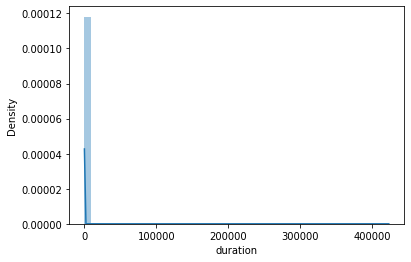

In [44]:
gfg = sns.distplot(data["duration"])

C:\mlops\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

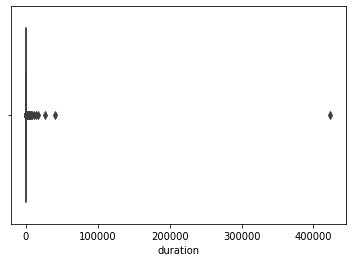

In [45]:
sns.boxplot(data["duration"])

In [46]:
#clipping duration between 1 and 60 min inclusive
data = data[(data.duration >= 1) & (data.duration <= 60)]

In [47]:
data.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
0,B00009,2021-01-01 00:27:00,2021-01-01 00:44:00,NaN,NaN,None,B00009,17.000000
1,B00009,2021-01-01 00:50:00,2021-01-01 01:07:00,NaN,NaN,None,B00009,17.000000
3,B00037,2021-01-01 00:13:09,2021-01-01 00:21:26,NaN,72.0,None,B00037,8.283333
4,B00037,2021-01-01 00:38:31,2021-01-01 00:53:44,NaN,61.0,None,B00037,15.216667
5,B00037,2021-01-01 00:59:02,2021-01-01 01:08:05,NaN,71.0,None,B00037,9.050000


In [48]:
len(data)

1109826

C:\mlops\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

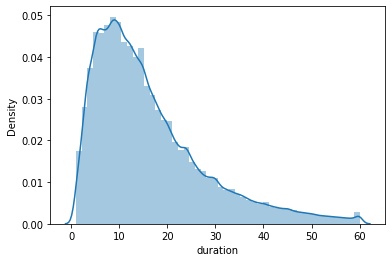

In [49]:
sns.displot(data.duration)

In [75]:
categorical = ["PUlocationID","DOlocationID"]
train_df = data[categorical + ["duration"]]
train_df.head()

,PUlocationID,DOlocationID,duration
0,NaN,NaN,17.000000
1,NaN,NaN,17.000000
3,NaN,72.0,8.283333
4,NaN,61.0,15.216667
5,NaN,71.0,9.050000


In [76]:
train_df.fillna(-1, inplace = True)
train_df.head()

C:\Users\prash\AppData\Local\Temp\ipykernel_7784\3953750351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.fillna(-1, inplace = True)


,PUlocationID,DOlocationID,duration
0,-1.0,-1.0,17.000000
1,-1.0,-1.0,17.000000
3,-1.0,72.0,8.283333
4,-1.0,61.0,15.216667
5,-1.0,71.0,9.050000


In [77]:
train_df[categorical]= train_df[categorical].astype("str")

C:\Users\prash\AppData\Local\Temp\ipykernel_7784\3798240154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[categorical]= train_df[categorical].astype("str")


In [78]:
#fraction of -1 in PUIlocationID
(train_df.PUlocationID == "-1.0").sum()/len(train_df)

0.8352732770722617

In [85]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [79]:
dv = DictVectorizer()
X_train = train_df.iloc[:,:2]
y_train = train_df.iloc[:,2].values
X_train_dict = X_train.to_dict(orient = "records")
X_train = dv.fit_transform(X_train_dict)
X_train.shape

(1109826, 525)

In [81]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [130]:
#mse
y_pred = lr.predict(X_train)
mean_squared_error(y_train,y_pred, squared = False)

10.528519395145974

C:\mlops\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\mlops\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


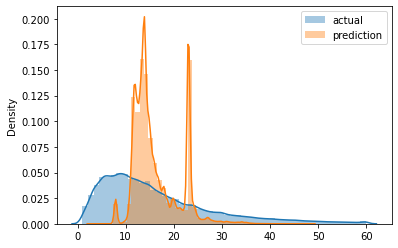

In [88]:
sns.distplot(y_train , label = "actual")
sns.distplot(y_pred, label = "prediction")
plt.legend()

In [122]:
def test_process(dataframe):
    dataframe["duration"] = (dataframe.dropOff_datetime - dataframe.pickup_datetime).dt.total_seconds().div(60)
    dataframe = dataframe[(dataframe.duration >= 1) & (dataframe.duration <= 60)]
    categorical = ["PUlocationID","DOlocationID"]
    dataframe = dataframe[categorical + ["duration"]]
    dataframe.fillna(-1, inplace = True)
    dataframe[categorical]= dataframe[categorical].astype("str")
    X_val = dataframe.iloc[:,:2]
    y_val = dataframe.iloc[:,2].values
    X_val_dict = X_val.to_dict(orient = "records")
    return dv.transform(X_val_dict) , y_val

In [131]:
test_df = pd.read_parquet("Data/fhv_tripdata_2021-02.parquet")
test_df.head()

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00013,2021-02-01 00:01:00,2021-02-01 01:33:00,NaN,NaN,None,B00014
1,B00021,2021-02-01 00:55:40,2021-02-01 01:06:20,173.0,82.0,None,B00021
2,B00021,2021-02-01 00:14:03,2021-02-01 00:28:37,173.0,56.0,None,B00021
3,B00021,2021-02-01 00:27:48,2021-02-01 00:35:45,82.0,129.0,None,B00021
4,B00037,2021-02-01 00:12:50,2021-02-01 00:26:38,NaN,225.0,None,B00037


In [132]:
X_val , y_val = test_process(test_df)
X_val.shape

(990113, 525)

In [133]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val,y_pred, squared = "False")

121.31450207263485